# PyLab 2 - Introduction to Fitting Methods
### Author: Ayush Pandhi (1003227457)
### Date: September 27, 2018

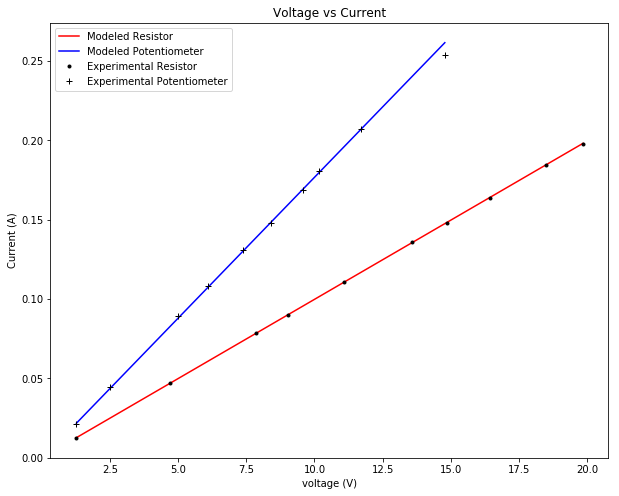

Experimental Resistor Resistance:  100.21085704969553 Ohms
Experimental Potentiometer Resistance:  56.36789686576079 Ohms
Experimental Resistor Chi Squared Value:  0.09479978819680444
Experimental Potentiometer Chi Squared Value  3.1816101320347774


In [52]:
#Importing required modules
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Defining the model function
def f(x, a, b):
    return a*x + b

#Loading the resistor data
voltage1 = np.loadtxt('resistor data.txt', skiprows=1, usecols=(0,))
current1 = (1/1000)*(np.loadtxt('resistor data.txt', skiprows=1, usecols=(1,)))

#Loading the potentiometer
voltage2 = np.loadtxt('potentiometer data.txt', skiprows=1, usecols=(0,))
current2 = (1/1000)*(np.loadtxt('potentiometer data.txt', skiprows=1, usecols=(1,)))

#Finding max of precision and accuracy error for resistor data
v_error1 = np.empty(len(voltage1))
for i in range(len(voltage1)):
    v_error1[i] = max(voltage1[i]*0.0025, 0.01)
    
i_error1 = np.empty(len(current1))
for i in range(len(current1)):
    i_error1[i] = max(current1[i]*0.0075, 0.1/1000)
    
#Finding max of precision and accuracy error for potentiometer data
v_error2 = np.empty(len(voltage2))
for i in range(len(voltage2)):
    v_error2[i] = max(voltage2[i]*0.0025, 0.01) 
    
i_error2 = np.empty(len(current2))
for i in range(len(current2)):
    i_error2[i] = max(current2[i]*0.0075, 0.1/1000)

#Calling curve_fit() for these data sets 
p_opt1 , p_cov1 = curve_fit(f, voltage1, current1, (1/100, 0), i_error1, True)
p_opt2 , p_cov2 = curve_fit(f, voltage2, current2, (1/57, 0), i_error2, True)

#Outputs based on the model function
output1 = f(voltage1, p_opt1[0], p_opt1[1])
output2 = f(voltage2, p_opt2[0], p_opt2[1])

#Plotting Voltage vs Current
plt.figure(figsize=(10,8))
plt.plot(voltage1, output1, 'r-', label='Modeled Resistor')
plt.plot(voltage2, output2, 'b-', label='Modeled Potentiometer')
plt.plot(voltage1, current1, 'k.', label='Experimental Resistor')
plt.plot(voltage2, current2, 'k+', label='Experimental Potentiometer')
plt.xlabel('voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage vs Current')
plt.legend(loc='upper left')
plt.show()

#Defining chi squared data
chisqr1 = sum(((current1-output1)/i_error1)**2)
chisqr1 = chisqr1/8
chisqr2 = sum(((current2-output2)/i_error2)**2)
chisqr2 = chisqr2/8

#Printing resulting parameters
print('Experimental Resistor Resistance: ', 1/p_opt1[0], 'Ohms')
print('Experimental Potentiometer Resistance: ', 1/p_opt2[0], 'Ohms')
print('Experimental Resistor Chi Squared Value: ', chisqr1)
print('Experimental Potentiometer Chi Squared Value ', chisqr2)

In [53]:
p_opt1[1]

4.096381647025012e-05

In [54]:
(p_cov1[1][1])**0.5

0.00011566577109331363

In [55]:
p_opt2[1]

-0.0007242471865493923

In [56]:
(p_cov2[1][1])**0.5

0.0001931464652765778

In [57]:
resistance1 = voltage1/current1

In [58]:
resistance1

array([100.        ,  99.78768577,  99.87277354, 100.22222222,
       100.        , 100.0736377 , 100.26990553, 100.48899756,
       100.2712968 , 100.45546559])

In [59]:
resistance2 = voltage2/current2

In [60]:
resistance2

array([58.7962963 , 56.53153153, 56.22895623, 56.22119816, 56.29290618,
       56.71843349, 56.79525223, 56.26385809, 56.61835749, 58.18897638])

In [61]:
np.mean(resistance1), np.mean(resistance2)

(100.14419847103865, 56.86557660673615)

In [62]:
v_error1, i_error1

(array([0.01    , 0.01175 , 0.019625, 0.02255 , 0.027675, 0.033975,
        0.03715 , 0.0411  , 0.0462  , 0.049625]),
 array([0.0001    , 0.00035325, 0.0005895 , 0.000675  , 0.00083025,
        0.0010185 , 0.0011115 , 0.001227  , 0.00138225, 0.001482  ]))

In [67]:
v_mean_error1 = (1/10)*((sum(v_error1**2))**0.5)
i_mean_error1 = (1/10)*((sum(i_error1**2))**0.5)
r_mean_error1 = (np.mean(resistance1))*((((v_mean_error1/np.mean(voltage1))**2) + ((i_mean_error1/np.mean(current1))**2))**0.5)
print(r_mean_error1)

0.2787816853798438


In [68]:
v_mean_error2 = (1/10)*((sum(v_error2**2))**0.5)
i_mean_error2 = (1/10)*((sum(i_error2**2))**0.5)
r_mean_error2 = (np.mean(resistance2))*((((v_mean_error2/np.mean(voltage2))**2) + ((i_mean_error2/np.mean(current2))**2))**0.5)
print(r_mean_error2)

0.15953830413352238


In [69]:
print(v_mean_error1, i_mean_error1)
print(v_mean_error2, i_mean_error2)

0.010352934366642148 0.00030842306070558346
0.0069360863424556655 0.0003593519244765499


In [70]:
v_error2, i_error2

(array([0.01    , 0.01    , 0.012525, 0.01525 , 0.01845 , 0.021   ,
        0.023925, 0.025375, 0.0293  , 0.03695 ]),
 array([0.000162  , 0.000333  , 0.00066825, 0.00081375, 0.00098325,
        0.00111075, 0.00126375, 0.001353  , 0.0015525 , 0.001905  ]))